# Image Colorization with Unet

Developed by Taylla Milena Theodoro for the ICMC course SCC5830 - Image Processing (2021)
This project aims to perform automatic image colorization using Unet model architecture and will follow the steps: 
- Dataset Preparation
- Model Definition
- Model Training and evaluation
- Results demonstration

### Importing Libraries

In [12]:
import tensorflow as tf
keras = tf.keras
from tensorflow.keras import datasets, layers, models
import keras.layers as L
from keras.models import Model


from skimage.color import rgb2gray
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt


## Dataset Preparation
The chosen Dataset is Cifar10 dataset, which contain images from diverse scenarios and locations which enable the network to learn to colorize different kinds of images.


### Load the dataset


In [8]:
(train_images, _), (test_images,_) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 5s 0us/step


### Printing some examples
It is possible to observe that Cifar10 is quite diverse, it present commum photos that coud be easily be taking in by anyone.

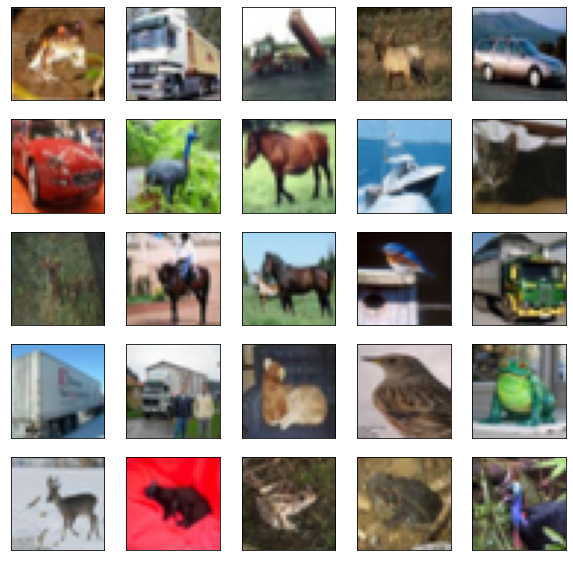

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])    
plt.show()

### Image Preprocessing
As this project aims to colorize images, our preprocessing will be to transform our images to gray scale.


In [13]:
train_gray=rgb2gray(train_images/np.mean(train_images))
test_gray=rgb2gray(test_images)

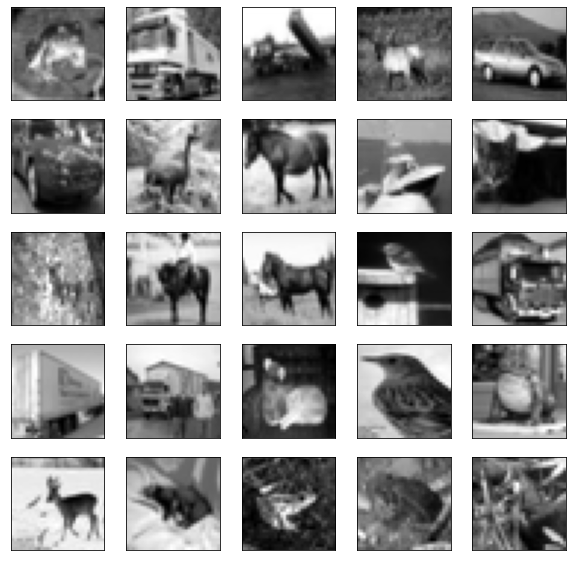

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_gray[i],cmap='gray')    
plt.show()


# Model Definition

In [15]:
def UNet():
    Xinpt = L.Input([None, None, 1])
    X0 = L.Conv2D(64, (3, 3), padding='same')(Xinpt)
    X0 = L.BatchNormalization()(X0)
    X0 = L.LeakyReLU(alpha=0.2)(X0)    #l,b,64
    X0 = L.Conv2D(64, (3, 3), strides=1, padding='same')(X0)
    X0 = L.BatchNormalization()(X0)
    X0 = L.LeakyReLU(alpha=0.2)(X0)    #l,b,64
    
    X1 = L.MaxPool2D((2, 2), strides=2)(X0)    #l/2,b/2,64
    X1 = L.Conv2D(128, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.LeakyReLU(alpha=0.2)(X1)
    X1 = L.Conv2D(128, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.LeakyReLU(alpha=0.2)(X1)    #l/2,b/2,128
    
    X2 = L.MaxPool2D((2, 2), strides=2)(X1)    #l/4,b/4,128
    X2 = L.Conv2D(256, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.LeakyReLU(alpha=0.2)(X2)
    X2 = L.Conv2D(256, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.LeakyReLU(alpha=0.2)(X2)    #l/4,b/4,256
    
    X3 = L.MaxPool2D((2, 2), strides=2)(X2)    #l/8,b/8,256
    X3 = L.Conv2D(512, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.LeakyReLU(alpha=0.2)(X3)
    X3 = L.Conv2D(512, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.LeakyReLU(alpha=0.2)(X3)    #l/8,b/8,512
    
    X4 = L.MaxPool2D((2, 2), strides=2)(X3)    #l/16,b/16,512
    X4 = L.Conv2D(1024, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.LeakyReLU(alpha=0.2)(X4)
    X4 = L.Conv2D(1024, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.LeakyReLU(alpha=0.2)(X4)    #l/16,b/16,1024
    
    X4 = L.Conv2DTranspose(512, (2, 2), strides=2)(X4)    #l/8,b/8,512
    X4 = L.Concatenate()([X3, X4])     #l/8,b/8,1024
    X4 = L.Conv2D(512, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.Activation('relu')(X4)
    X4 = L.Conv2D(512, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.Activation('relu')(X4)    #l/8,b/8,512
    
    X3 = L.Conv2DTranspose(256, (2, 2), strides=2)(X4)    #l/4,b.4,256
    X3 = L.Concatenate()([X2, X3])     #l/4,b/4,512
    X3 = L.Conv2D(256, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.Activation('relu')(X3)
    X3 = L.Conv2D(256, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.Activation('relu')(X3)    #l/4,b/4,256
    
    X2 = L.Conv2DTranspose(128, (2, 2), strides=2)(X3)    #l/2,b/2,128
    X2 = L.Concatenate()([X1, X2])     #l/2,b/2,256
    X2 = L.Conv2D(128, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.Activation('relu')(X2)
    X2 = L.Conv2D(128, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.Activation('relu')(X2)   #l/2,b/2,128
    
    X1 = L.Conv2DTranspose(64, (2, 2), strides=2)(X2)    #l,b,64
    X1 = L.Concatenate()([X0, X1])    #l,b,128
    X1 = L.Conv2D(64, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.Activation('relu')(X1)
    X1 = L.Conv2D(64, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.Activation('relu')(X1)    #l,b,64
    
    X0 = L.Conv2D(3, (1, 1), strides=1)(X1)     #l,b,3 
    model = Model(inputs=Xinpt, outputs=X0)
    return model

In [16]:
model = UNet()

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['accuracy'])

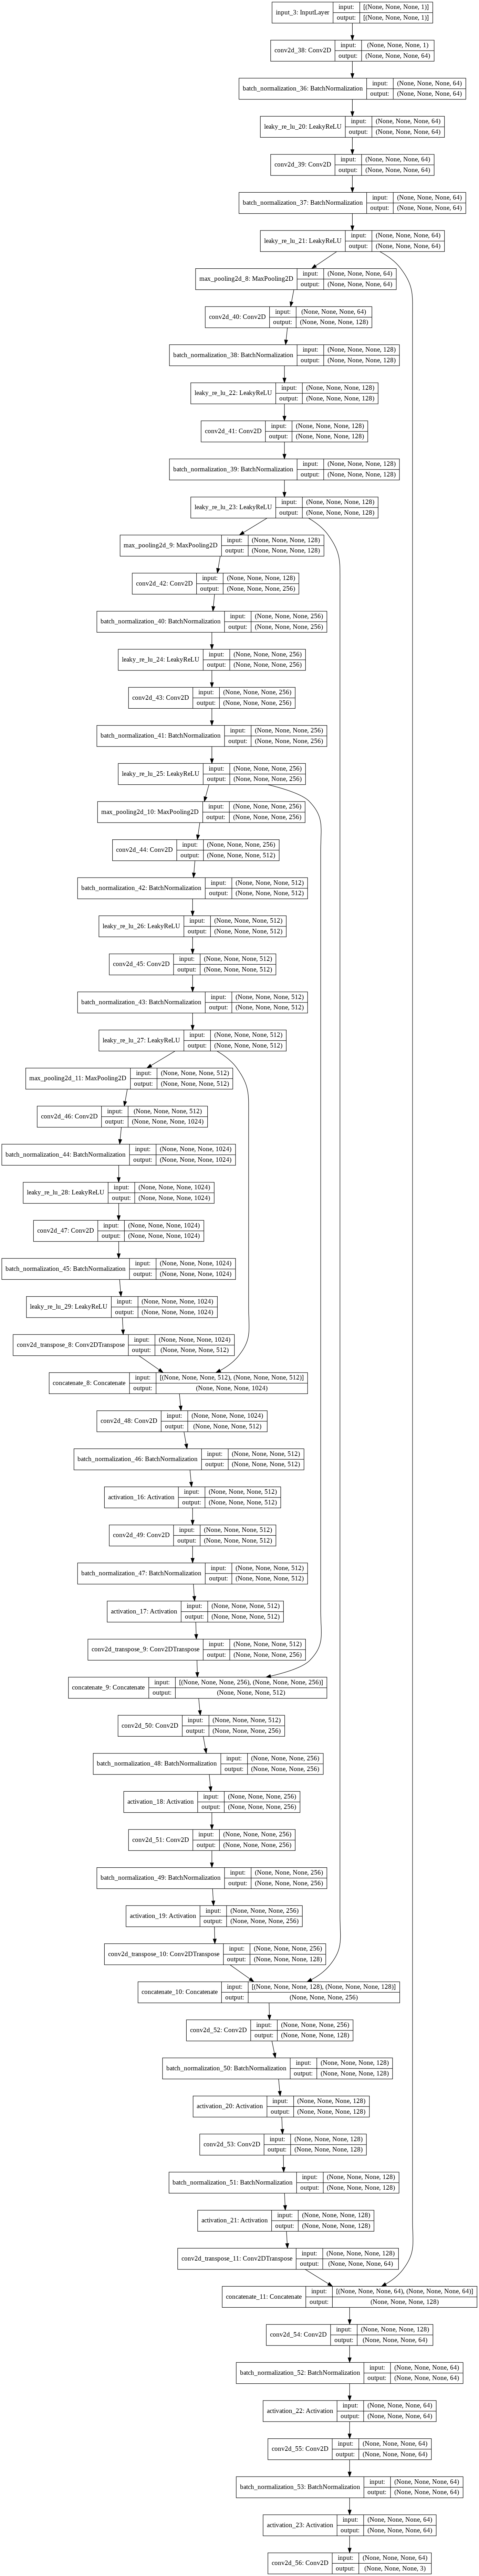

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, None, None, 6 640         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, None, None, 6 256         conv2d_38[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_20 (LeakyReLU)      (None, None, None, 6 0           batch_normalization_36[0][0]     
____________________________________________________________________________________________

In [23]:
model_history = model.fit(train_gray, train_images, batch_size=64, epochs=20, validation_data=(test_gray, test_images))

Epoch 1/20
782/782 [==============================] - 82s 101ms/step - loss: 0.0064 - accuracy: 0.4876 - val_loss: 0.0938 - val_accuracy: 0.5095
Epoch 2/20
782/782 [==============================] - 78s 99ms/step - loss: 0.0061 - accuracy: 0.5022 - val_loss: 0.0757 - val_accuracy: 0.3937
Epoch 3/20
782/782 [==============================] - 78s 99ms/step - loss: 0.0059 - accuracy: 0.5096 - val_loss: 0.0865 - val_accuracy: 0.5159
Epoch 4/20
782/782 [==============================] - 78s 99ms/step - loss: 0.0058 - accuracy: 0.5129 - val_loss: 0.0855 - val_accuracy: 0.5105
Epoch 5/20
782/782 [==============================] - 83s 106ms/step - loss: 0.0057 - accuracy: 0.5188 - val_loss: 0.0780 - val_accuracy: 0.4487
Epoch 6/20
782/782 [==============================] - 78s 100ms/step - loss: 0.0057 - accuracy: 0.5242 - val_loss: 0.0801 - val_accuracy: 0.4812
Epoch 7/20
782/782 [==============================] - 78s 99ms/step - loss: 0.0056 - accuracy: 0.5278 - val_loss: 0.0773 - val_accura

### Evaluating our training and validation
This helps us to decide the best number of epochs so that our model converge

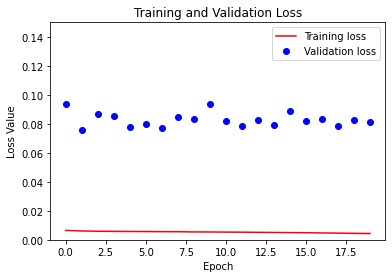

In [25]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(20)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 0.15])
plt.legend()
plt.show()

# Ploting image samples results

### Original Test images

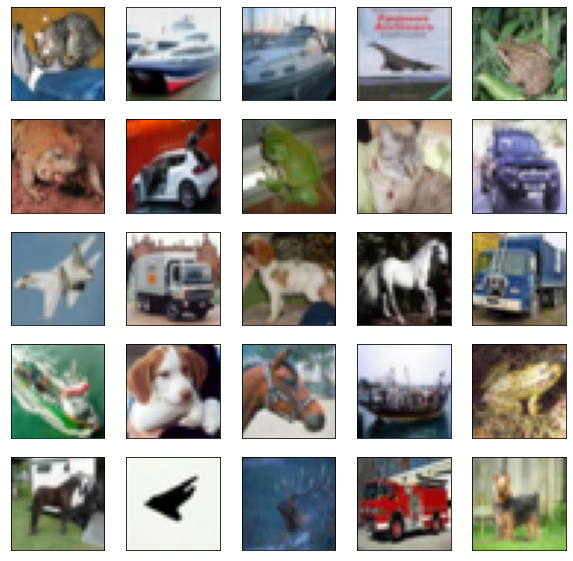

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])    
plt.show()

### Predicted testing images

In [27]:
prediction = model.predict(test_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


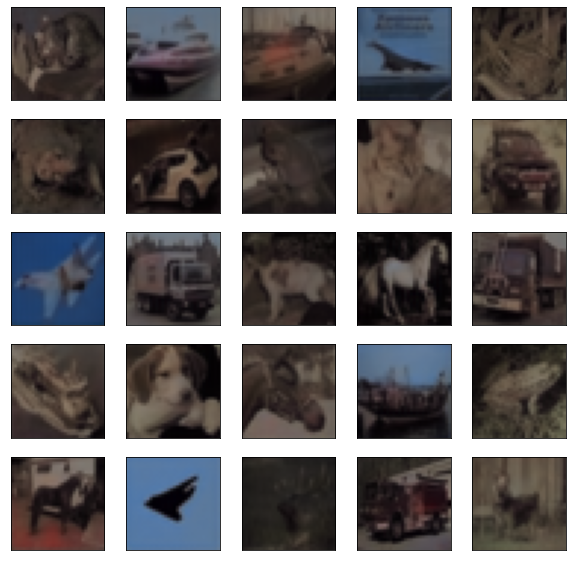

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(prediction[i])    
plt.show()